In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Please Enter a country
India
Please state whether you want to see cases,deaths or how many people recovered from Coronavirus in India.Type c for cases, d for deaths or r for recovered
c


<IPython.core.display.Javascript object>


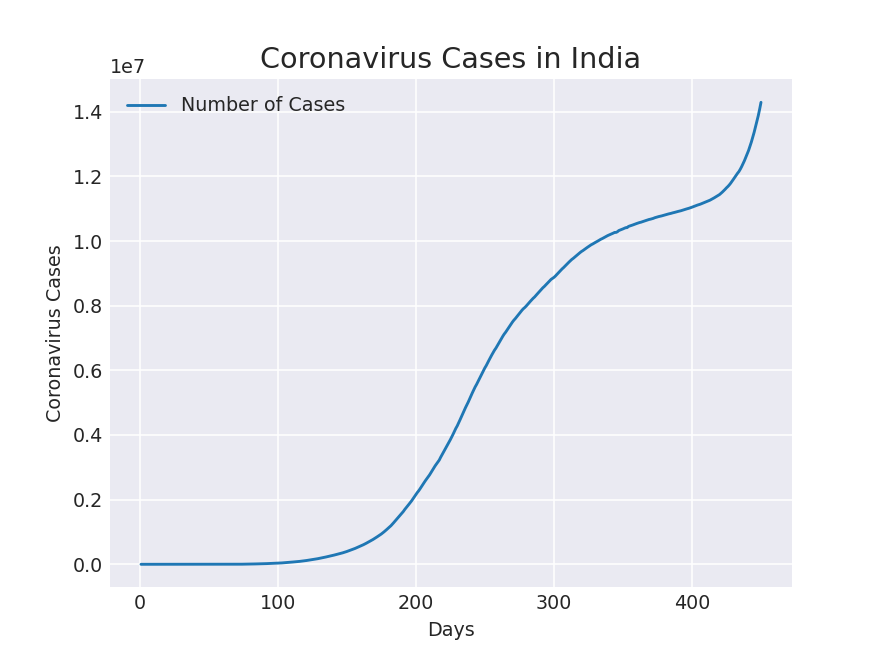

<IPython.core.display.Javascript object>


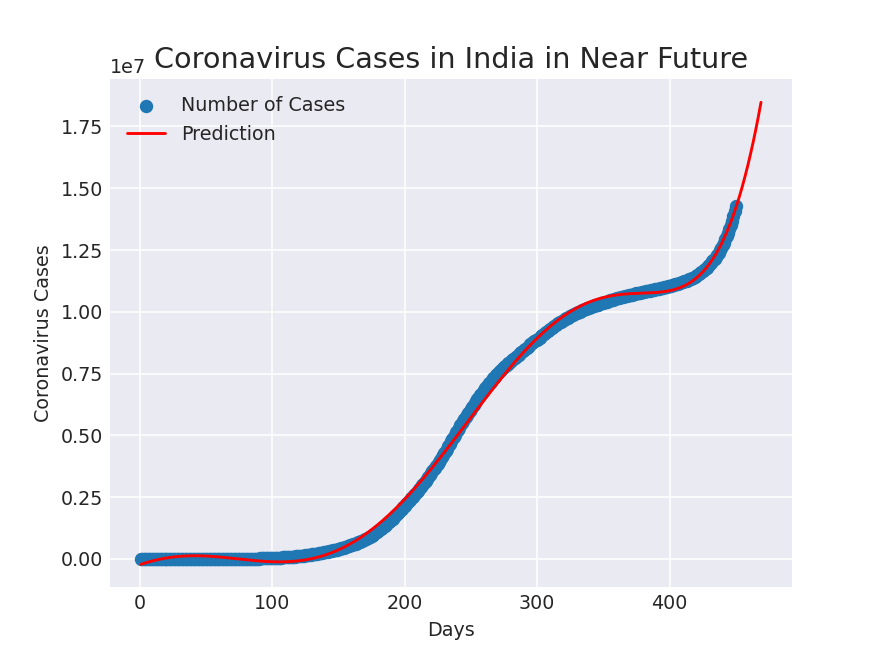

In [1]:
%matplotlib notebook
from datetime import datetime, timedelta, date
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import requests
import json
import locale
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
finallist=[]
l2 = []
l3 = []
input_list = []
test_finallist = []
rmses = []
degrees = np.arange(1, 20)
min_rmse, min_deg = 1e10, 0
def DateFormatter(x):
    s = '01222020'
    global given_date
    given_date = datetime(month=int(s[:2]), day=int(s[2:4]), year=int(s[4:]))
    given_date += timedelta(days=x)
    final = str(given_date.strftime('%m{}%d{}%y').format('/','/'))
    if int(final[0:2])<10 and int(final[3:5])<10:
        final = final[1:]
        final = final[0 : 2 : ] + final[3 : :]
    elif int(final[0:2])<10:
        final = final[1:]
    elif int(final[3:5])<10:
        final = final[0 : 2 : ] + "/" + final[4 : :]
    return final

def DateFormatterForPlot(x):
    s_plot = '01222020'
    global given_date_plot
    given_date_plot = datetime(month=int(s_plot[:2]), day=int(s_plot[2:4]), year=int(s_plot[4:]))
    given_date_plot += timedelta(days=x)
    final_plot1 = str(given_date_plot.strftime('%b %d'))
    if int(final_plot1[4:6])<10:
        final_plot1 = final_plot1[0 : 4 : ] + final_plot1[5 : :]
    return final_plot1

def CapitalConvertor(message):
    capitalized_message = " ".join([
       word.capitalize()
       for word in message.split(" ")
    ])
    return capitalized_message

user_input = input("Please Enter a country\n")
user_input = user_input.lower().capitalize()
user_input_choice= input("Please state whether you want to see cases,deaths or how many people recovered from Coronavirus in {}.Type c for cases, d for deaths or r for recovered\n".format(CapitalConvertor(user_input)))
if user_input_choice == 'C' or user_input_choice == 'c':
    user_input_choice = 'cases'
elif user_input_choice == 'D' or user_input_choice == 'd':
    user_input_choice = 'deaths'
elif user_input_choice == 'R' or user_input_choice == 'r':
    user_input_choice = 'recovered'
else:
    print("Not a valid choice")
base_site = f'https://disease.sh/v3/covid-19/historical/{user_input}?lastdays=all'
r = requests.get(base_site)
if r.status_code == 200:
    packages_json = r.json()
    
    today_date = str(date.today().strftime('%m{}%d{}%y').format('/','/'))
    if int(today_date[0:2])<10 and int(today_date[3:5])<10:
        today_date = today_date[1:]
        today_date = today_date[0 : 2 : ] + today_date[3 : :]
    elif int(today_date[0:2])<10:
        today_date = today_date[1:]
    elif int(today_date[3:5])<10:
        today_date = today_date[0 : 2 : ] + "/" + today_date[4 : :]
        
    for i in range(1,1000):
        current_date = DateFormatter(i)
        if current_date==today_date:
            given_date = given_date - timedelta(days=10)
            f_date = datetime(2020, 1, 22)
            delta = given_date - f_date
            break;     
    
    for i in range(delta.days+9):#Day 188 is 27th July
        a = DateFormatter(i)
        packages_str = json.dumps(packages_json['timeline'][user_input_choice][a], indent=2)
        finallist.append(int(packages_str))
    
    count = 0
    for i in finallist:
        count = count + 1
    for i in range(1,count+1):
        l2.append(i)
    for i in range(1,count+20):
        l3.append(i)
        
        
    if user_input_choice == 'cases' or user_input_choice == 'deaths':
        final_label = "Number of {}".format(user_input_choice.capitalize())
        final_title = "Coronavirus {} in {}".format(user_input_choice.capitalize(),CapitalConvertor(user_input))
        final_title2 = "Coronavirus {} in {} in Near Future".format(user_input_choice.capitalize(),CapitalConvertor(user_input))
        final_ylabel = "Coronavirus {}".format(user_input_choice.capitalize())
    elif user_input_choice == 'recovered':
        final_label = "People Recoverd from Coronavirus on that day"
        final_title = "People Recovered from Coronavirus in {}".format(CapitalConvertor(user_input))
        final_title2 = "People Recovered from Coronavirus in {} in Near Future".format(CapitalConvertor(user_input))
        final_ylabel = "People Recovered from Coronavirus"
    else:
        final_label = "Illegal Access"
        final_title = "Illegal Access"
        final_title2 = "Illegal Access"
        final_ylabel = "Illegal Access"
    
    with plt.style.context('seaborn-dark'):
        fig = plt.figure()
        ax = plt.subplot(1, 1, 1)
        line, = plt.plot(l2,finallist, label=final_label)
        plt.legend(loc="upper left", fontsize=10)
        plt.title(final_title, fontsize=15)
        plt.xlabel("Days", fontsize=10)
        plt.ylabel(final_ylabel, fontsize=10)
        ax.grid(True)

        annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
        annot.set_visible(False)

        def update_annot(ind):
            x,y = line.get_data()
            annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
            locale.setlocale(locale.LC_ALL, 'en_US')
            text = "x = {}\ny= {}".format(DateFormatterForPlot(x[ind["ind"][0]].item()-1), locale.format("%d", y[ind["ind"][0]], grouping=True))
            annot.set_text(text)
            annot.get_bbox_patch().set_facecolor('blue')
            annot.get_bbox_patch().set_alpha(0.4)

        def hover(event):
            vis = annot.get_visible()
            if event.inaxes == ax:
                cont, ind = line.contains(event)
                if cont:
                    update_annot(ind)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                else:
                    if vis:
                        annot.set_visible(False)
                        fig.canvas.draw_idle()

        fig.canvas.mpl_connect("motion_notify_event", hover)

        plt.show()
        
    #Machine Learning Starts
    data = {'Days Passed': l2, 'Total Covid-19 {} in {}'.format(user_input_choice.capitalize(),user_input):finallist} 
    data1 = {'Predicted {}'.format(user_input_choice.capitalize()):l3} 
    df = pd.DataFrame(data) 
    df1 = pd.DataFrame(data1) 
    
    X_train = df['Days Passed'].values.reshape(-1, 1)
    X1 = df1['Predicted {}'.format(user_input_choice.capitalize())].values.reshape(-1, 1)
    y_train = df['Total Covid-19 {} in {}'.format(user_input_choice.capitalize(),user_input)]
    
    for deg in degrees:

        # Train features
        poly_features = PolynomialFeatures(degree=deg, include_bias=False)
        x_poly_train = poly_features.fit_transform(X_train)

        # Linear regression
        lin_reg = LinearRegression()
        lin_reg.fit(x_poly_train, y_train)

        # Compare with test data
        for i in range(delta.days+1, delta.days+9):
            input_list.append(i)
            
        temp_data = {'Input': input_list} 
        temp_df = pd.DataFrame(temp_data)
        X_test = temp_df['Input'].values.reshape(-1, 1)
        
        for i in range(delta.days+1, delta.days+9):
            abc = DateFormatter(i)
            packages_str = json.dumps(packages_json['timeline'][user_input_choice][abc], indent=2)
            test_finallist.append(int(packages_str))
    
        temp_data1 = {'Input': test_finallist} 
        temp_df1 = pd.DataFrame(temp_data1)
        y_test = temp_df1['Input'].values.reshape(-1, 1)

        x_poly_test = poly_features.fit_transform(X_test)
        poly_predict = lin_reg.predict(x_poly_test)
        poly_mse = mean_squared_error(y_test, poly_predict)
        poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_rmse)
    
        # Cross-validation of degree
        if min_rmse > poly_rmse:
            min_rmse = poly_rmse
            min_deg = deg
          
    poly_features = PolynomialFeatures(degree=min_deg, include_bias = False)
    X_poly = poly_features.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly,y_train)
    
    with plt.style.context('seaborn-darkgrid'):
        fig_final = plt.figure()
        ax_final = plt.subplot(1, 1, 1)
        a = plt.scatter(l2,finallist, label=final_label)
        line_final, = plt.plot(l3, lin_reg.predict(poly_features.fit_transform(X1)), color = 'red', label="Prediction")
        handles, labels = plt.gca().get_legend_handles_labels()
        order = [1,0]
        plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10)
        plt.title(final_title2, fontsize=15)
        plt.xlabel("Days", fontsize=10)
        plt.ylabel(final_ylabel, fontsize=10)
        ax_final.grid(True)
        
        annot_final = ax_final.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
        annot_final.set_visible(False)

        def update_annot_final(ind_final):
            x_final,y_final = line_final.get_data()
            annot_final.xy = (x_final[ind_final["ind"][0]], y_final[ind_final["ind"][0]])
            locale.setlocale(locale.LC_ALL, 'en_US')
            text_final = "x = {}\ny= {}".format(DateFormatterForPlot(x_final[ind_final["ind"][0]].item()-1), locale.format("%d", y_final[ind_final["ind"][0]], grouping=True))
            annot_final.set_text(text_final)
            annot_final.get_bbox_patch().set_facecolor('blue')
            annot_final.get_bbox_patch().set_alpha(0.4)

        def hover_final(event):
            vis_final = annot_final.get_visible()
            if event.inaxes == ax_final:
                cont_final, ind_final = line_final.contains(event)
                if cont_final:
                    update_annot_final(ind_final)
                    annot_final.set_visible(True)
                    fig_final.canvas.draw_idle()
                else:
                    if vis_final:
                        annot_final.set_visible(False)
                        fig_final.canvas.draw_idle()

        fig_final.canvas.mpl_connect("motion_notify_event", hover_final)

        plt.show()
    
else:
    print("Not a valid country")

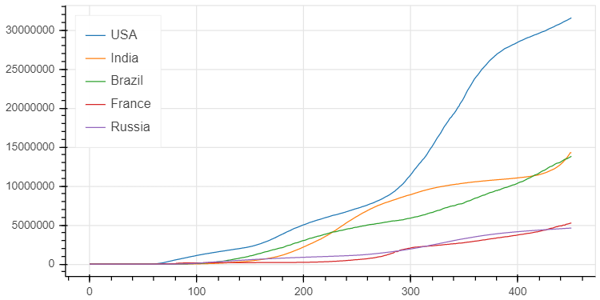

In [7]:
#Program to view time series of top 5 countries in Covid-19 countries
from datetime import datetime, timedelta, date
from selenium import webdriver
import requests
import json
import numpy as np 
import pandas as pd
import hvplot.pandas
import holoviews as hv
from bokeh.plotting import show
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import Category10
from bokeh.plotting import figure
from bokeh.io.export import get_screenshot_as_png
import warnings
warnings.filterwarnings('ignore')
clist = []
corona_data = []
finallist = []
sub = []
demo_clist = []
demo_count = []

def DateFormatter(x):
    s = '01222020'
    global given_date
    given_date = datetime(month=int(s[:2]), day=int(s[2:4]), year=int(s[4:]))
    given_date += timedelta(days=x)
    final = str(given_date.strftime('%m{}%d{}%y').format('/','/'))
    if int(final[0:2])<10 and int(final[3:5])<10:
        final = final[1:]
        final = final[0 : 2 : ] + final[3 : :]
    elif int(final[0:2])<10:
        final = final[1:]
    elif int(final[3:5])<10:
        final = final[0 : 2 : ] + "/" + final[4 : :]
    return final

base_site = 'https://disease.sh/v3/covid-19/countries?yesterday=false&twoDaysAgo=false&sort=cases'
r = requests.get(base_site)

packages_json = r.json()
for i in range(5):
    packages_str = json.dumps(packages_json[i]['country'], indent=2).rstrip('"').lstrip('"')
    clist.append(packages_str)

for sample_country in clist:
    base_site_country = f'https://disease.sh/v3/covid-19/historical/{sample_country}?lastdays=all'
    r_country = requests.get(base_site_country)
    if r_country.status_code == 200:
        packages_json_country = r_country.json()

        today_date = str(date.today().strftime('%m{}%d{}%y').format('/','/'))
        if int(today_date[0:2])<10 and int(today_date[3:5])<10:
            today_date = today_date[1:]
            today_date = today_date[0 : 2 : ] + today_date[3 : :]
        elif int(today_date[0:2])<10:
            today_date = today_date[1:]
        elif int(today_date[3:5])<10:
            today_date = today_date[0 : 2 : ] + "/" + today_date[4 : :]

        for i in range(1,1000):
            current_date = DateFormatter(i)
            if current_date==today_date:
                given_date = given_date - timedelta(days=10)
                f_date = datetime(2020, 1, 22)
                delta = given_date - f_date
                break;     

        for i in range(delta.days+10):#Day 188 is 27th July
            try:
                a = DateFormatter(i)
                packages_str_country = json.dumps(packages_json_country['timeline']["cases"][a], indent=2)
                finallist.append(int(packages_str_country))
            except:
                pass
            
        count = 0
        for i in finallist:
            count = count + 1
            
        count = count//5
    else:
        print("Error!")

for sample in clist:
    demo_clist.extend([sample] * count)
    
for i in range(count):
    sub.extend((finallist[i],finallist[i+count],finallist[i+(count*2)],finallist[i+(count*3)],finallist[i+(count*4)]))

for i in range(count):
    corona_data.append(sub[5*i:5*(i+1)])
    
for i in range(count):
    demo_count.append(i)
    
demo_count = demo_count * 5

idx = pd.date_range(start='2020-01-22', periods=count).tolist()
idx = idx * 5

#df = pd.DataFrame(corona_data, index=idx, columns = clist)
df = pd.DataFrame({'group': demo_clist,'x': demo_count,'y': finallist})

p2 = figure(plot_width=600, plot_height=300)
for i in range(len(clist)):
    source = ColumnDataSource(
    data={'x':df.loc[df.group == clist[i]].x,
           'group':df.loc[df.group == clist[i]].group,
           'y':df.loc[df.group == clist[i]].y})
    p2.line(x='x',
            y='y',
            source=source,
            legend = clist[i],
            color = (Category10[5])[i])
    p2.legend.location = "top_left"
    p2.left[0].formatter.use_scientific = False
    p2.toolbar.logo = None
    p2.toolbar_location = None

hover = HoverTool(tooltips =[
     ('group','@group'),('x','@x'),('y','@y')])
p2.add_tools(hover)
driver = webdriver.Chrome('./chromedriver')
get_screenshot_as_png(p2, driver=driver)
#show(p2)

#p1 = df.hvplot()
#my_bokeh_plot = hv.render(p1, backend='bokeh')
#my_bokeh_plot.toolbar.logo = None
#my_bokeh_plot.toolbar_location = None
#my_bokeh_plot.left[0].formatter.use_scientific = False
#show(my_bokeh_plot)